# Text Classification using CNN

Develop a text classification model to classify Twitter messages (tweets) into either positive or negative sentiment categories. The dataset consists of tweets along with their sentiment labels (positive or negative). The goal is to build a neural network model that can accurately predict the sentiment of a given tweet based on its textual content.

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
DATASET_COLUMNS = ['target', 'ids', 'date', 'flag', 'user', 'text']
df = pd.read_csv('training.1600000.processed.noemoticon.csv',encoding='ISO-8859-1', names=DATASET_COLUMNS)
df

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
...,...,...,...,...,...,...
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


In [3]:
df.head()

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [4]:
#cheeching for the null values
df.isnull().sum()

target    0
ids       0
date      0
flag      0
user      0
text      0
dtype: int64

In [5]:
df.target.unique()

array([0, 4], dtype=int64)

In [6]:
# Replacing the values to ease understanding.
df['target'] = df['target'].replace(4,1)

In [7]:
df.target.unique()

array([0, 1], dtype=int64)

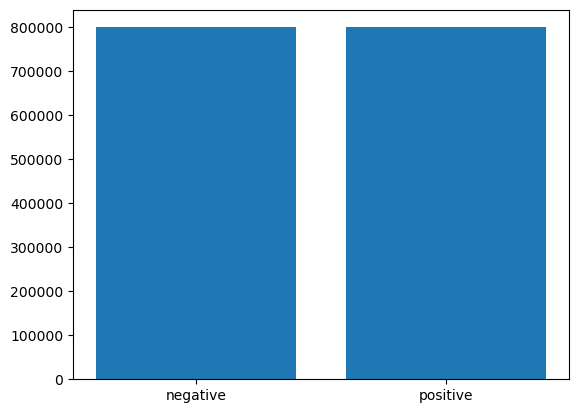

In [8]:
# Plot to show how equally distributed the classes are.
classes = df.target.unique()
counts = []

for i in classes:
    count = len(df[df.target==i])
    counts.append(count)

plt.bar(['negative', 'positive'], counts)
plt.show()

In [10]:
import nltk
from nltk.corpus import stopwords

In [11]:
nltk.download('stopwords')
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shrey\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
stop_words = stopwords.words('english')
stop_words.remove('not')

In [13]:
import re
import string
english_punctuations = string.punctuation
punctuations_list = english_punctuations

def cleaning_text(x):
    temp =" ".join([w for w in str(x).split() if w not in stop_words])
    translator =  str.maketrans("", "", punctuations_list)
    temp =  str(temp).translate(translator)
    temp = re.sub('((www.[^s]+)|(https?://[^s]+))',' ',temp)   #to remove URLs
    temp = re.sub('[0-9]+', '', temp) 
    #  remove special characters
    temp = re.sub(r"[^a-zA-Z0-9]+", ' ', temp)   #Removing Non-Alphanumeric Characters
    return temp.lower()
df['text'] = df['text'].apply(cleaning_text)

In [14]:
df

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,switchfoot httptwitpiccomyzl a s bummer you sh...
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,upset cant update facebook texting it might cr...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,kenichan i dived many times ball managed save ...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,whole body feels itchy like fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,nationwideclass no not behaving all im mad her...
...,...,...,...,...,...,...
1599995,1,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,just woke up having school best feeling ever
1599996,1,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,thewdbcom very cool hear old walt interviews h...
1599997,1,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,are ready mojo makeover ask details
1599998,1,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,happy th birthday boo alll time tupac amaru sh...


In [15]:
from sklearn.model_selection import train_test_split

In [16]:
sample_size = int(len(df)*0.1)
sampleDf = df.sample(sample_size, random_state=23)
x = sampleDf.text.values
y = sampleDf.target.values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=32)

In [17]:
x_train = [cleaning_text(text) for text in x_train]
x_test = [cleaning_text(text) for text in x_test]

# Tokenization

In [18]:
from tensorflow.keras import preprocessing
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [19]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(x_train)     #creates an internal vocabulary index

X_train = tokenizer.texts_to_sequences(x_train)
X_test = tokenizer.texts_to_sequences(x_test)

# total number of unique words in the vocabulary
vocab_size = len(tokenizer.word_index) + 1  # Adding 1 because of reserved 0 index

In [20]:
print(x_train[0])  #before tokenization
print(X_train[0])   #after tokenization

teefy aww poor mexican feel good
[32899, 251, 249, 2920, 45, 3]


# Padding

In [21]:
#Calculate the maximum sequence length across the entire dataset 
lens_train = [len(i) for i in X_train]
lens_test = [len(i) for i in X_test]
lens = lens_train + lens_test

maxlen = np.max(lens)

print('Max len:', maxlen)

Max len: 30


In [22]:
X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

# Label Encoding

In [23]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical 

In [38]:
# encode categorical target labels into numerical values.
encoder = LabelEncoder()
encoder.fit(y)

#transform the target labels y_train and y_test into encoded numerical values
encoded_Y_test = encoder.transform(y_test)
encoded_Y_train = encoder.transform(y_train)

# convert integers to dummy variables, convert the encoded numerical labels into one-hot encoded vectors.
dummy_y_test =to_categorical(encoded_Y_test)
dummy_y_train = to_categorical(encoded_Y_train)

# Modelling

In [25]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import losses
from scikeras.wrappers import KerasClassifier
from keras.models import Sequential

from tensorflow.keras.layers import Embedding, Dense, Dropout, GlobalMaxPool1D


In [26]:
embedding_dim = 100  # vector representation of words/neuron amount after the input 

model = Sequential()  # initiates the model
#converts input integers (sequences of word indices) into dense vectors of fixed size 
model.add(layers.Embedding(input_dim=vocab_size,  #size of vocabulary
                          output_dim=embedding_dim,  #length of vector of each word
                          input_length=maxlen))  # size of the input layer determined by maxlen calculated before
model.add(layers.Dropout(0.2))   #to prevent overfitting
model.add(layers.GlobalMaxPool1D()) 
model.add(layers.Dropout(0.2)) #fully connected layers with the specified number of units and activation function
model.add(layers.Dense(50, activation='relu'))  # additional hidden layer
model.add(layers.Dropout(0.2))
model.add(layers.Dense(50, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(2, activation='softmax'))  # prediction layer, 2 is the number of classes we have

D:\Users\shrey\anaconda3\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [27]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [28]:
history = model.fit(X_train, dummy_y_train,
                    epochs=3,  # times model will run through the data
                    verbose=True,
                    validation_data=(X_test, dummy_y_test),
                    batch_size=128)  # number of samples to work through before updating the internal model parameters.

#Model Evaluation - Training Set
loss, accuracy = model.evaluate(X_train, dummy_y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))

#Model Evaluation -Testing Set
loss, accuracy = model.evaluate(X_test, dummy_y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Epoch 1/3
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 137s 134ms/step - accuracy: 0.6683 - loss: 0.5884 - val_accuracy: 0.7702 - val_loss: 0.4758
Epoch 2/3
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 132s 132ms/step - accuracy: 0.8166 - loss: 0.4053 - val_accuracy: 0.7719 - val_loss: 0.4892
Epoch 3/3
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 132s 132ms/step - accuracy: 0.8680 - loss: 0.3080 - val_accuracy: 0.7639 - val_loss: 0.5384
Training Accuracy: 0.9294
Testing Accuracy:  0.7639


In [29]:
# plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

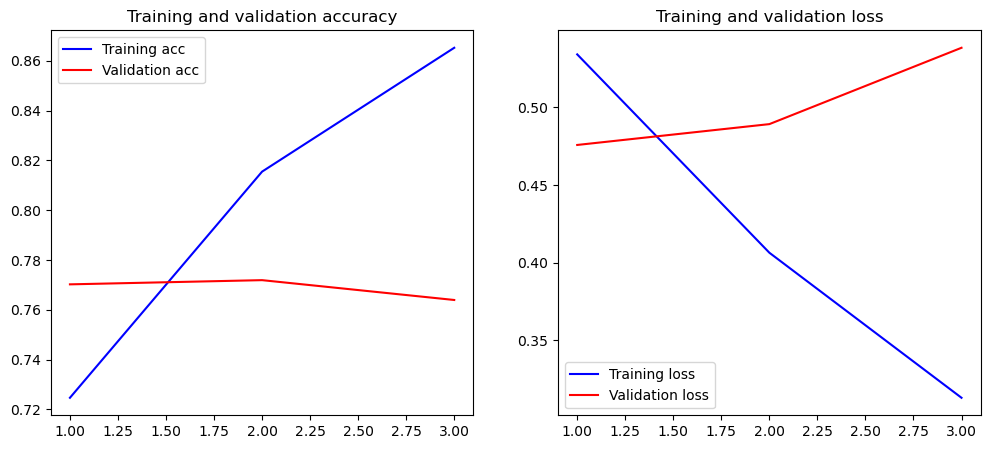

In [30]:
plot_history(history)

# Confusion matrix

In [31]:
from sklearn.metrics import confusion_matrix, classification_report
# Evaluate the model
loss, accuracy = model.evaluate(X_test, dummy_y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

# Get predictions
y_pred = model.predict(X_test)

# Convert predictions to classes
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(dummy_y_test, axis=1)

# Print classification report
print(classification_report(y_test_classes, y_pred_classes))


Testing Accuracy:  0.7639
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
              precision    recall  f1-score   support

           0       0.76      0.78      0.77     16012
           1       0.77      0.75      0.76     15988

    accuracy                           0.76     32000
   macro avg       0.76      0.76      0.76     32000
weighted avg       0.76      0.76      0.76     32000



1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


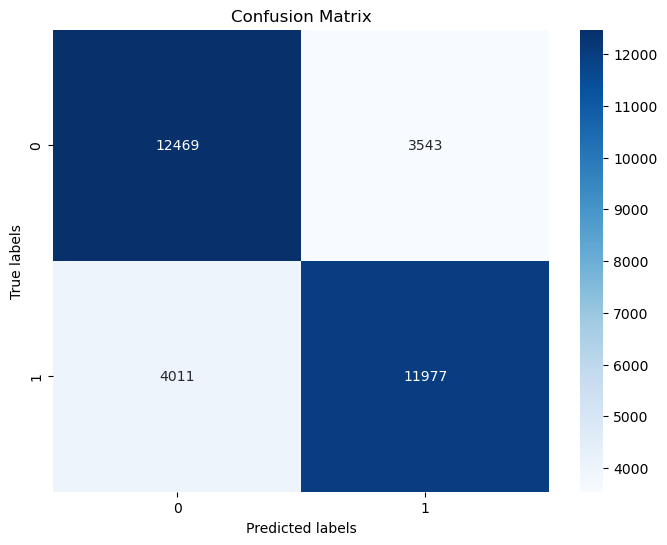

In [35]:
from sklearn.metrics import confusion_matrix

# Get predictions
y_pred = model.predict(X_test)

# Convert predictions to classes
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(dummy_y_test, axis=1)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test_classes, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [36]:
tweetList = ['Best tweet ever!', 'Mondays are the worst...']
vectTweet = tokenizer.texts_to_sequences(np.array(tweetList))  # vectorizes the tweet using our vectorizer
vectTweet = pad_sequences(vectTweet, padding='post', maxlen=maxlen)  # adds padding

prediction = model.predict(vectTweet)  # predicts class of the tweet
for enum, i in enumerate(tweetList):
  print(i, '| This tweet is', 'positive' if encoder.classes_[np.argmax(prediction[enum])]==1 else 'negative')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
Best tweet ever! | This tweet is positive
Mondays are the worst... | This tweet is negative
